In [29]:
# Imports necessários:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opções gerais necessárias:

pd.options.display.float_format = "{:,.2f}".format

In [4]:
# Sobre os dados:

'''
Os dados utilizados nesta pesquisa são da base: Relação Anual de informações Sociais (RAIS)
do ministério da economia (antes ministério do trabalho).

São dados referentes à vinculos empregatícios e a estabelicimentos de trabalho. Toda empresa
com registro no Brasil deve mandar uma relação anual de seus funcionários, com dados específicos como
próprios de trabalho, como o salário, o endereço do trabalho entre outros.

Os dados foram coletados de uma base de microdandos, tratados e sanitizados.

Fonte dos dados: http://pdet.mte.gov.br/microdados-rais-e-caged

O recorte temporal é de 2009 e 2019.
'''

In [16]:
RAIS_2019 = pd.read_csv("../data/raw/DATA_RAIS_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)
RAIS_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração',
                            'Sexo Trabalhador':'Sexo'}, inplace = True)
RAIS_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,212405,63119,6,53,09,"6,361.98",1
1,AC,317205,63119,6,50,09,"4,535.76",1
2,AC,317205,63119,6,50,09,"3,332.64",1
3,AC,212420,63119,6,19,09,544.00,1
4,AC,212405,63119,7,54,09,"6,391.52",1


In [19]:
# Demonstração dos dados por UF:

frequencia_UF = RAIS_2019.UF.value_counts()
percentual_UF = RAIS_2019.UF.value_counts(normalize = True) * 100

dist_freq_UF = pd.DataFrame(
    {'Frequência UF': frequencia_UF, 'Porcentagem (%)': percentual_UF}
)

dist_freq_UF

,Frequência UF,Porcentagem (%)
SP,57470,49.36
RJ,13242,11.37
MG,8523,7.32
DF,7322,6.29
SC,6490,5.57
RS,5407,4.64
PR,4689,4.03
BA,2996,2.57
PE,2102,1.81
ES,1938,1.66


In [21]:
# Demonstração dos dados por CBO:

frequencia_CBO = RAIS_2019.CBO.value_counts()
percentual_CBO = RAIS_2019.CBO.value_counts(normalize = True) * 100

dist_freq_CBO = pd.DataFrame(
    {'Frequência UF': frequencia_CBO, 'Porcentagem (%)': percentual_CBO}
)

dist_freq_CBO

,Frequência UF,Porcentagem (%)
212405,46976,40.35
212420,20733,17.81
317110,16259,13.96
317205,8662,7.44
317210,7671,6.59
212410,2738,2.35
142520,2107,1.81
212310,1917,1.65
212415,1521,1.31
212315,1443,1.24


In [22]:
# Demonstração dos dados por CNAE:

frequencia_CNAE = RAIS_2019.CNAE.value_counts()
percentual_CNAE = RAIS_2019.CNAE.value_counts(normalize = True) * 100

dist_freq_CNAE = pd.DataFrame(
    {'Frequência UF': frequencia_CNAE, 'Porcentagem (%)': percentual_CNAE}
)

dist_freq_CNAE

,Frequência UF,Porcentagem (%)
62015,29597,25.42
62091,27350,23.49
62040,24833,21.33
62031,14128,12.13
63119,11437,9.82
62023,8432,7.24
63194,652,0.56


In [24]:
# Demonstração dos dados por Escolaridade:

frequencia_Escolaridade = RAIS_2019.Escolaridade.value_counts()
percentual_Escolaridade = RAIS_2019.Escolaridade.value_counts(normalize = True) * 100

dist_freq_Escolaridade = pd.DataFrame(
    {'Frequência UF': frequencia_Escolaridade, 'Porcentagem (%)': percentual_Escolaridade}
)

dist_freq_Escolaridade

,Frequência UF,Porcentagem (%)
9,65451,56.22
8,26192,22.50
7,21804,18.73
6,1148,0.99
5,830,0.71
10,450,0.39
11,337,0.29
4,129,0.11
3,51,0.04
2,37,0.03


In [25]:
# Demonstração dos dados por Idade:

frequencia_Idade = RAIS_2019.Idade.value_counts()
percentual_Idade = RAIS_2019.Idade.value_counts(normalize = True) * 100

dist_freq_Idade = pd.DataFrame(
    {'Frequência UF': frequencia_Idade, 'Porcentagem (%)': percentual_Idade}
)

dist_freq_Idade

,Frequência UF,Porcentagem (%)
27,7251,6.23
28,7110,6.11
26,6999,6.01
25,6403,5.50
29,6245,5.36
...,...,...
76,1,0.00
77,1,0.00
78,1,0.00
15,1,0.00


In [26]:
# Demonstração dos dados por Raça:

frequencia_Raça = RAIS_2019.Raça.value_counts()
percentual_Raça = RAIS_2019.Raça.value_counts(normalize = True) * 100

dist_freq_Raça = pd.DataFrame(
    {'Frequência UF': frequencia_Raça, 'Porcentagem (%)': percentual_Raça}
)

dist_freq_Raça

,Frequência UF,Porcentagem (%)
02,88288,75.83
08,18455,15.85
09,4794,4.12
04,2460,2.11
06,2013,1.73
01,235,0.20
{ñ,184,0.16


In [27]:
# Demonstração dos dados por Remuneração:

frequencia_Remuneração = RAIS_2019.Remuneração.value_counts()
percentual_Remuneração = RAIS_2019.Remuneração.value_counts(normalize = True) * 100

dist_freq_Remuneração = pd.DataFrame(
    {'Frequência UF': frequencia_Remuneração, 'Porcentagem (%)': percentual_Remuneração}
)

dist_freq_Remuneração

,Frequência UF,Porcentagem (%)
840.00,1140,0.98
"1,000.00",1100,0.94
"1,200.00",1059,0.91
"1,500.00",1004,0.86
"2,000.00",767,0.66
...,...,...
"8,054.98",1,0.00
"5,801.25",1,0.00
"2,248.92",1,0.00
"3,719.23",1,0.00


In [28]:
# Demonstração dos dados por Sexo:

frequencia_Sexo = RAIS_2019.Sexo.value_counts()
percentual_Sexo = RAIS_2019.Sexo.value_counts(normalize = True) * 100

dist_freq_Sexo = pd.DataFrame(
    {'Frequência UF': frequencia_Sexo, 'Porcentagem (%)': percentual_Sexo}
)

dist_freq_Sexo

,Frequência UF,Porcentagem (%)
1,89439,76.82
2,26990,23.18


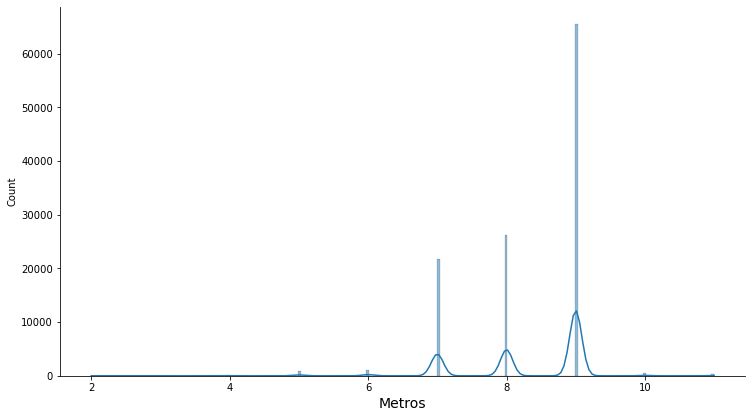

In [36]:
# Histrogramas:

ax = sns.displot(RAIS_2019.Escolaridade, kde = True)

ax.fig.set_size_inches(12, 6)
ax.set_titles('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabels('Metros', fontsize = 14)
ax

In [11]:
CNAE_CBO_SEXO_2019_FREQ = pd.read_csv("../data/cleaned/CNAE_CBO_SEXO_2019_freq.csv", sep = ";", index_col = 0, encoding = 'latin-1', skipinitialspace = True)
CNAE_CBO_SEXO_2019_SUM = pd.read_csv("../data/cleaned/CNAE_CBO_SEXO_2019_sum.csv", sep = ";", index_col = 0, encoding = 'latin-1', skipinitialspace = True)

CNAE_CBO_SEXO_2019_SUM

,620_M,620_F,631_M,631_F
CBO,,,,
1236,"14,119,591.78","1,925,808.44","1,341,897.36","400,845.89"
1425,"126,749,394.34","34,250,385.31","12,074,624.70","2,696,317.74"
2122,"38,126,913.27","4,588,985.32","7,541,340.31","953,891.81"
2123,"48,500,293.06","8,395,918.66","6,582,728.33","630,752.99"
2124,"613,732,276.11","146,834,836.98","66,131,278.43","15,641,804.89"
3171,"150,984,907.25","22,270,888.89","9,268,820.17","1,150,304.96"
3172,"49,179,218.30","14,888,919.20","9,696,404.44","2,810,834.92"


In [14]:
frequencia_masc = (CNAE_CBO_SEXO_2019_FREQ['620_M'] + CNAE_CBO_SEXO_2019_FREQ['631_M']).sum()
frequencia_fem = (CNAE_CBO_SEXO_2019_FREQ['620_F'] + CNAE_CBO_SEXO_2019_FREQ['631_F']).sum()
frequencia_total = frequencia_masc + frequencia_fem

porcentagem_freq_masc = (frequencia_masc / frequencia_total) * 100
porcentagem_freq_fem = (frequencia_fem / frequencia_total) * 100

massa_salarial_masc = (CNAE_CBO_SEXO_2019_SUM['620_M'] + CNAE_CBO_SEXO_2019_SUM['631_M']).sum()
massa_salarial_fem = (CNAE_CBO_SEXO_2019_SUM['620_F'] + CNAE_CBO_SEXO_2019_SUM['631_F']).sum()
massa_salarial_total = massa_salarial_masc + massa_salarial_fem

porcentagem_massa_masc = (massa_salarial_masc / massa_salarial_total) * 100
porcentagem_massa_fem = (massa_salarial_fem / massa_salarial_total) * 100

media_masc = massa_salarial_masc / frequencia_masc
media_fem = massa_salarial_fem / frequencia_fem

In [15]:
dist_freq_geral = pd.DataFrame(
    {'Pessoas': [frequencia_masc, frequencia_fem], 
     'Pessoas (%)': [porcentagem_freq_masc, porcentagem_freq_fem],
     'Massa Salarial': [massa_salarial_masc, massa_salarial_fem], 
     'Massa Salarial (%)': [porcentagem_massa_masc, porcentagem_massa_fem],
     'Média Salarial': [media_masc, media_fem]}
)
dist_freq_geral.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_geral.rename_axis('Sexo', axis = 'columns', inplace = True)

dist_freq_geral

Sexo,Pessoas,Pessoas (%),Massa Salarial,Massa Salarial (%),Média Salarial
Masculino,193036,79.89,"1,154,029,687.85",81.76,"5,978.31"
Feminino,48592,20.11,"257,440,496.00",18.24,"5,298.00"


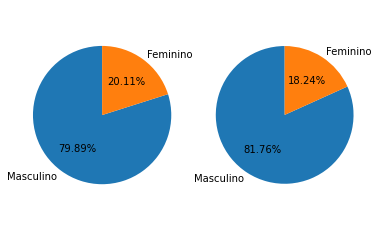

In [6]:
freq_fig, (freq_ax, massa_ax) = plt.subplots(1, 2)
freq_ax.pie(dist_freq_geral.Pessoas, labels = dist_freq_geral.index, autopct = '%1.2f%%', startangle = 90)
freq_ax.axis('equal')
massa_ax.pie(dist_freq_geral['Massa Salarial'], labels = dist_freq_geral.index, autopct = '%1.2f%%', startangle = 90)
massa_ax.axis('equal')
freq_fig.savefig("./figures/freq_massa_sexo_pie.svg")

In [81]:
variacao_media = ((dist_freq_geral['Média Salarial'][0] - dist_freq_geral['Média Salarial'][1])/dist_freq_geral['Média Salarial'][0]) * 100
print("As mulheres recebem {0:.4g} % a menos que os homens".format(variacao_media))

As mulheres recebem 11.38 % a menos que os homens


In [87]:
#Tabela de médias

frequencia_masc_df = CNAE_CBO_SEXO_2019_FREQ['620_M'] + CNAE_CBO_SEXO_2019_FREQ['631_M']
frequencia_fem_df = CNAE_CBO_SEXO_2019_FREQ['620_F'] + CNAE_CBO_SEXO_2019_FREQ['631_F']

massa_salarial_masc_df = CNAE_CBO_SEXO_2019_SUM['620_M'] + CNAE_CBO_SEXO_2019_SUM['631_M']
massa_salarial_fem_df = CNAE_CBO_SEXO_2019_SUM['620_F'] + CNAE_CBO_SEXO_2019_SUM['631_F']

media_salarial_masc_df = massa_salarial_masc_df / frequencia_masc_df
media_salarial_fem_df = massa_salarial_fem_df / frequencia_fem_df

CBO_SEXO_2019_FREQ = pd.DataFrame(
    {'Quant. Pessoas (M)': frequencia_masc_df,
     'Quant. Pessoas (M) %': (frequencia_masc_df / frequencia_masc) * 100,
     'Quant. Pessoas (F)': frequencia_fem_df,
     'Quant. Pessoas (F) %': (frequencia_fem_df / frequencia_fem) * 100}
)

CBO_SEXO_2019_SUM = pd.DataFrame(
    {'Massa Salarial (M)': massa_salarial_masc_df,
     'Massa Salarial (M) %': (massa_salarial_masc_df / massa_salarial_masc) * 100,
     'Massa Salarial (F)': massa_salarial_fem_df,
     'Massa Salarial (F) %': (massa_salarial_fem_df / massa_salarial_fem) * 100}
)
CBO_SEXO_2019_MEAN = pd.DataFrame(
     {'Média Salarial (M)': media_salarial_masc_df,
      'Média Salarial (F)': media_salarial_fem_df,
      'Diferença': ((media_salarial_masc_df - media_salarial_fem_df) / media_salarial_masc_df) * 100},
      index = CNAE_CBO_SEXO_2019_SUM.index
)
CBO_SEXO_2019_MEAN

,Média Salarial (M),Média Salarial (F),Diferença
CBO,,,
1236,"23,569.34","21,345.45",9.44
1425,"11,448.46","9,945.28",13.13
2122,"11,414.21","9,758.59",14.50
2123,"7,862.26","6,943.59",11.68
2124,"6,085.53","5,344.10",12.18
3171,"4,510.25","4,365.55",3.21
3172,"2,676.41","2,481.74",7.27
